In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from mlxtend.preprocessing import TransactionEncoder

from mlxtend.frequent_patterns import apriori, association_rules

In [2]:
df_movies = pd.read_csv('my_movies.csv')
df_movies.head() 

,V1,V2,V3,V4,V5,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,Sixth Sense,LOTR1,Harry Potter1,Green Mile,LOTR2,1,0,1,1,0,1,0,0,0,1
1,Gladiator,Patriot,Braveheart,NaN,NaN,0,1,0,0,1,0,0,0,1,0
2,LOTR1,LOTR2,NaN,NaN,NaN,0,0,1,0,0,1,0,0,0,0
3,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
4,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0


**Exploratory Data Analysis (EDA)**

Observation: First five columns have movies data. 
Need to convert data into numeric categorical data with movies names as column headers. Also need to fill null values with spaces. 

In [3]:
df_movies = df_movies[['V1', 'V2', 'V3', 'V4', 'V5']]
df_movies.head()

,V1,V2,V3,V4,V5
0,Sixth Sense,LOTR1,Harry Potter1,Green Mile,LOTR2
1,Gladiator,Patriot,Braveheart,NaN,NaN
2,LOTR1,LOTR2,NaN,NaN,NaN
3,Gladiator,Patriot,Sixth Sense,NaN,NaN
4,Gladiator,Patriot,Sixth Sense,NaN,NaN


In [4]:
df_movies = df_movies.fillna('')
df_movies

,V1,V2,V3,V4,V5
0,Sixth Sense,LOTR1,Harry Potter1,Green Mile,LOTR2
1,Gladiator,Patriot,Braveheart,,
2,LOTR1,LOTR2,,,
3,Gladiator,Patriot,Sixth Sense,,
4,Gladiator,Patriot,Sixth Sense,,
5,Gladiator,Patriot,Sixth Sense,,
6,Harry Potter1,Harry Potter2,,,
7,Gladiator,Patriot,,,
8,Gladiator,Patriot,Sixth Sense,,
9,Sixth Sense,LOTR,Gladiator,Green Mile,


In [5]:
array_movies = df_movies.values
array_movies

array([['Sixth Sense', 'LOTR1', 'Harry Potter1', 'Green Mile', 'LOTR2'],
       ['Gladiator', 'Patriot', 'Braveheart', '', ''],
       ['LOTR1', 'LOTR2', '', '', ''],
       ['Gladiator', 'Patriot', 'Sixth Sense', '', ''],
       ['Gladiator', 'Patriot', 'Sixth Sense', '', ''],
       ['Gladiator', 'Patriot', 'Sixth Sense', '', ''],
       ['Harry Potter1', 'Harry Potter2', '', '', ''],
       ['Gladiator', 'Patriot', '', '', ''],
       ['Gladiator', 'Patriot', 'Sixth Sense', '', ''],
       ['Sixth Sense', 'LOTR', 'Gladiator', 'Green Mile', '']],
      dtype=object)

In [6]:
te = TransactionEncoder()
movies_te = te.fit(array_movies).transform(array_movies)
movies_te

array([[False, False, False,  True,  True, False, False,  True,  True,
        False,  True],
       [ True,  True,  True, False, False, False, False, False, False,
         True, False],
       [ True, False, False, False, False, False, False,  True,  True,
        False, False],
       [ True, False,  True, False, False, False, False, False, False,
         True,  True],
       [ True, False,  True, False, False, False, False, False, False,
         True,  True],
       [ True, False,  True, False, False, False, False, False, False,
         True,  True],
       [ True, False, False, False,  True,  True, False, False, False,
        False, False],
       [ True, False,  True, False, False, False, False, False, False,
         True, False],
       [ True, False,  True, False, False, False, False, False, False,
         True,  True],
       [ True, False,  True,  True, False, False,  True, False, False,
        False,  True]])

In [7]:
# Convert to integers
movies_te = movies_te.astype('int')
movies_te

array([[0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1],
       [1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0],
       [1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0],
       [1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1],
       [1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1],
       [1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1],
       [1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0],
       [1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0],
       [1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1],
       [1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1]])

In [8]:
te.columns_

['',
 'Braveheart',
 'Gladiator',
 'Green Mile',
 'Harry Potter1',
 'Harry Potter2',
 'LOTR',
 'LOTR1',
 'LOTR2',
 'Patriot',
 'Sixth Sense']

In [9]:
df_movies_te = pd.DataFrame(movies_te, columns=te.columns_)
df_movies_te

,,Braveheart,Gladiator,Green Mile,Harry Potter1,Harry Potter2,LOTR,LOTR1,LOTR2,Patriot,Sixth Sense
0,0,0,0,1,1,0,0,1,1,0,1
1,1,1,1,0,0,0,0,0,0,1,0
2,1,0,0,0,0,0,0,1,1,0,0
3,1,0,1,0,0,0,0,0,0,1,1
4,1,0,1,0,0,0,0,0,0,1,1
5,1,0,1,0,0,0,0,0,0,1,1
6,1,0,0,0,1,1,0,0,0,0,0
7,1,0,1,0,0,0,0,0,0,1,0
8,1,0,1,0,0,0,0,0,0,1,1
9,1,0,1,1,0,0,1,0,0,0,1


In [10]:
df_movies_te = df_movies_te.iloc[:,1:]
df_movies_te

,Braveheart,Gladiator,Green Mile,Harry Potter1,Harry Potter2,LOTR,LOTR1,LOTR2,Patriot,Sixth Sense
0,0,0,1,1,0,0,1,1,0,1
1,1,1,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,1,1,0,0
3,0,1,0,0,0,0,0,0,1,1
4,0,1,0,0,0,0,0,0,1,1
5,0,1,0,0,0,0,0,0,1,1
6,0,0,0,1,1,0,0,0,0,0
7,0,1,0,0,0,0,0,0,1,0
8,0,1,0,0,0,0,0,0,1,1
9,0,1,1,0,0,1,0,0,0,1


In [11]:
df_movies_te.shape

(10, 10)

In [12]:
df_movies_te.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Braveheart     10 non-null     int64
 1   Gladiator      10 non-null     int64
 2   Green Mile     10 non-null     int64
 3   Harry Potter1  10 non-null     int64
 4   Harry Potter2  10 non-null     int64
 5   LOTR           10 non-null     int64
 6   LOTR1          10 non-null     int64
 7   LOTR2          10 non-null     int64
 8   Patriot        10 non-null     int64
 9   Sixth Sense    10 non-null     int64
dtypes: int64(10)
memory usage: 928.0 bytes


**Association Rules Extraction and Observations**

**Association Rules with minimum support 0.1**

In [13]:
# Extract Frequent Itemsets using apriori
frequent_items = apriori(df_movies_te, min_support=0.1, use_colnames=True)
frequent_items.count()

support     53
itemsets    53
dtype: int64

In [14]:
# Extract rules
rules = association_rules(frequent_items, metric='lift', min_threshold=0.5)
rules.sort_values('lift', ascending=False)[0:10]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
211,"(LOTR1, Harry Potter1)","(LOTR2, Sixth Sense)",0.1,0.1,0.1,1.0,10.0,0.09,inf
49,(LOTR),"(Gladiator, Green Mile)",0.1,0.1,0.1,1.0,10.0,0.09,inf
213,"(LOTR2, Harry Potter1)","(LOTR1, Sixth Sense)",0.1,0.1,0.1,1.0,10.0,0.09,inf
212,"(LOTR1, Sixth Sense)","(LOTR2, Harry Potter1)",0.1,0.1,0.1,1.0,10.0,0.09,inf
142,"(LOTR, Sixth Sense)","(Gladiator, Green Mile)",0.1,0.1,0.1,1.0,10.0,0.09,inf
143,"(Gladiator, Green Mile)","(LOTR, Sixth Sense)",0.1,0.1,0.1,1.0,10.0,0.09,inf
146,(LOTR),"(Gladiator, Green Mile, Sixth Sense)",0.1,0.1,0.1,1.0,10.0,0.09,inf
200,"(LOTR2, Sixth Sense)","(LOTR1, Green Mile)",0.1,0.1,0.1,1.0,10.0,0.09,inf
199,"(LOTR2, Green Mile)","(LOTR1, Sixth Sense)",0.1,0.1,0.1,1.0,10.0,0.09,inf
198,"(LOTR1, Sixth Sense)","(LOTR2, Green Mile)",0.1,0.1,0.1,1.0,10.0,0.09,inf


In [15]:
rules.count()

antecedents           250
consequents           250
antecedent support    250
consequent support    250
support               250
confidence            250
lift                  250
leverage              250
conviction            250
dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa4443b9c10>,
      dtype=object)

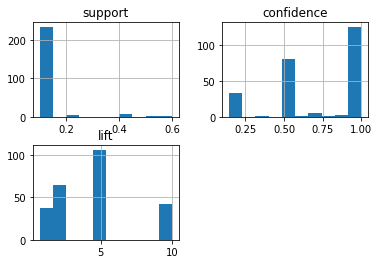

In [16]:
rules[['support', 'confidence', 'lift']].hist()

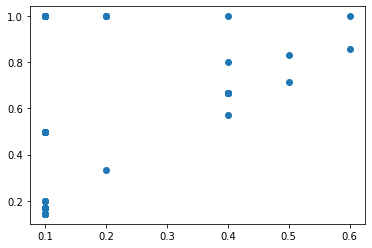

In [17]:
plt.scatter(rules['support'], rules['confidence'])

Observation: With minimum support as 0.1, 250 rules got extracted. Top 10 rules were displayed.

**Association Rules with minimum support 0.4**

In [18]:
# Extract Frequent Itemsets using apriori
frequent_items = apriori(df_movies_te, min_support=0.4, use_colnames=True)
frequent_items.count()

support     7
itemsets    7
dtype: int64

In [19]:
# Extract rules
rules = association_rules(frequent_items, metric='lift', min_threshold=0.5)
rules.sort_values('lift', ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Gladiator),(Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8
1,(Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf
8,"(Patriot, Sixth Sense)",(Gladiator),0.4,0.7,0.4,1.000000,1.428571,0.12,inf
9,(Gladiator),"(Patriot, Sixth Sense)",0.7,0.4,0.4,0.571429,1.428571,0.12,1.4
6,"(Gladiator, Sixth Sense)",(Patriot),0.5,0.6,0.4,0.800000,1.333333,0.10,2.0
11,(Patriot),"(Gladiator, Sixth Sense)",0.6,0.5,0.4,0.666667,1.333333,0.10,1.5
3,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8
2,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4
4,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
5,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2


In [20]:
rules.count()

antecedents           12
consequents           12
antecedent support    12
consequent support    12
support               12
confidence            12
lift                  12
leverage              12
conviction            12
dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa443d0f290>,
      dtype=object)

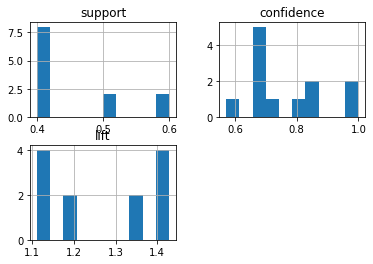

In [21]:
rules[['support', 'confidence', 'lift']].hist()

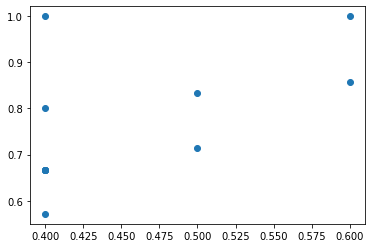

In [22]:
plt.scatter(rules['support'], rules['confidence'])

Observation: With minimum support as 0.4, only 12 rules got extracted. Top 10 rules were displayed.

We can observe that as minimum support value increased in apriori algorithm, frequent items numbers and associated rules got decreased.